In [1]:
import pandas as pd
import numpy as np

## Licitações

In [2]:
ANO = 2016

In [3]:
df_licitacao = pd.read_csv(f'{ANO}.csv/licitacao.csv',low_memory=False)
df_itens = pd.read_csv(f'{ANO}.csv/item.csv',low_memory=False)

### Análise Exploratória

In [58]:
df_licitacao.head()

,CD_ORGAO,NM_ORGAO,NR_LICITACAO,ANO_LICITACAO,CD_TIPO_MODALIDADE,NR_COMISSAO,ANO_COMISSAO,TP_COMISSAO,NR_PROCESSO,ANO_PROCESSO,...,TP_DOCUMENTO_FORNECEDOR,NR_DOCUMENTO_FORNECEDOR,TP_DOCUMENTO_VENCEDOR,NR_DOCUMENTO_VENCEDOR,VL_HOMOLOGADO,BL_GERA_DESPESA,DS_OBSERVACAO,PC_TX_ESTIMADA,PC_TX_HOMOLOGADA,BL_COMPARTILHADA
0,84100,PM DE ESPERANÇA DO SUL,1.0,2016,CNV,12.0,2016.0,P,001,2016,...,NaN,NaN,J,6.233397e+12,6420.0,S,NaN,NaN,NaN,N
1,84100,PM DE ESPERANÇA DO SUL,4.0,2016,CNV,12.0,2016.0,P,003,2016,...,NaN,NaN,NaN,NaN,NaN,S,NaN,NaN,NaN,N
2,82701,CM DE XANGRI-LÁ,1.0,2016,PRP,12.0,2016.0,G,01,2016,...,NaN,NaN,NaN,NaN,NaN,S,NaN,NaN,NaN,N
3,84100,PM DE ESPERANÇA DO SUL,6.0,2016,CNV,12.0,2016.0,P,005,2016,...,NaN,NaN,NaN,NaN,NaN,S,NaN,NaN,NaN,N
4,63900,PM DE COTIPORÃ,36.0,2016,PRD,NaN,NaN,NaN,344,2016,...,J,9.255424e+12,NaN,NaN,NaN,S,NaN,NaN,NaN,N


In [59]:
df_itens.head()

,CD_ORGAO,NR_LICITACAO,ANO_LICITACAO,CD_TIPO_MODALIDADE,NR_LOTE,NR_ITEM,NR_ITEM_ORIGINAL,DS_ITEM,QT_ITENS,SG_UNIDADE_MEDIDA,...,TP_ORCAMENTO,CD_TIPO_FAMILIA,CD_TIPO_SUBFAMILIA,TP_DOCUMENTO,NR_DOCUMENTO,TP_DOCUMENTO.1,NR_DOCUMENTO.1,TP_BENEFICIO_MICRO_EPP,PC_TX_ESTIMADA,PC_TX_HOMOLOGADA
0,77200,15.0,2016,PRP,1,2,2,"Pneu 1000/20 liso radial, dianteiro, 16 lonas,...",10.0,UN,...,M,745.0,632.0,J,8.774832e+12,NaN,NaN,L,NaN,NaN
1,77200,15.0,2016,PRP,1,4,4,"Pneu 12.4x24 garra baixa, 10 lonas",4.0,UN,...,M,745.0,632.0,J,8.774832e+12,NaN,NaN,L,NaN,NaN
2,77200,15.0,2016,PRP,1,7,7,Pneu 1400x24 mínimo 12 lonas,6.0,UN,...,M,745.0,632.0,J,8.774832e+12,NaN,NaN,L,NaN,NaN
3,77200,15.0,2016,PRP,1,8,8,"Pneu 17.5x25 12 lonas, capacidade mínima de ca...",4.0,UN,...,M,745.0,632.0,J,8.774832e+12,NaN,NaN,L,NaN,NaN
4,77200,15.0,2016,PRP,1,12,12,"Pneu 18.4x30 garra baixa, mínimo 10 lonas",4.0,UN,...,M,745.0,632.0,J,8.774832e+12,NaN,NaN,L,NaN,NaN


Checagem de valures nulos

In [15]:
df_licitacao.isna().sum().sum()

936552

In [60]:
df_itens.isna().sum().sum()

6016964

Checagem de valores duplicados

In [17]:
df_licitacao.duplicated().sum()

0

In [61]:
df_itens.duplicated().sum()

0

In [228]:
df_licitacao = df_licitacao.query("TP_OBJETO == 'COM'")

#### Quais são os principais bens materiais comprados pelos órgãos públicos do Rio Grande do Sul?

 5 itens mais frequentes

In [229]:
df_itens['DS_ITEM'].value_counts().nlargest(5)

MANGUEIRA SILICONE 2.1/2"    1669
MATERIAL                     1417
.                             951
SERVIÇO                       561
CENOURA                       324
Name: DS_ITEM, dtype: int64

Item com maiores quantidades

In [230]:
df_itens['QT_ITENS'].max()

43979000.0

In [231]:
df_itens[df_itens['QT_ITENS'] == df_itens['QT_ITENS'].max()]

,CD_ORGAO,NR_LICITACAO,ANO_LICITACAO,CD_TIPO_MODALIDADE,NR_LOTE,NR_ITEM,NR_ITEM_ORIGINAL,DS_ITEM,QT_ITENS,SG_UNIDADE_MEDIDA,...,TP_ORCAMENTO,CD_TIPO_FAMILIA,CD_TIPO_SUBFAMILIA,TP_DOCUMENTO,NR_DOCUMENTO,TP_DOCUMENTO.1,NR_DOCUMENTO.1,TP_BENEFICIO_MICRO_EPP,PC_TX_ESTIMADA,PC_TX_HOMOLOGADA
871067,88044,2.0,2017,RPO,1,253,33060253,OMEPRAZOL 20MG CÁPSULA,43979000.0,CAP,...,NaN,NaN,NaN,NaN,NaN,J,5531725000120.0,R,NaN,NaN


Maior valor unitário de um item

In [232]:
df_itens['VL_UNITARIO_HOMOLOGADO'].max()

71742116.84

In [233]:
df_max = df_itens[df_itens['VL_UNITARIO_HOMOLOGADO'] == df_itens['VL_UNITARIO_HOMOLOGADO'].max()]
df_max

,CD_ORGAO,NR_LICITACAO,ANO_LICITACAO,CD_TIPO_MODALIDADE,NR_LOTE,NR_ITEM,NR_ITEM_ORIGINAL,DS_ITEM,QT_ITENS,SG_UNIDADE_MEDIDA,...,TP_ORCAMENTO,CD_TIPO_FAMILIA,CD_TIPO_SUBFAMILIA,TP_DOCUMENTO,NR_DOCUMENTO,TP_DOCUMENTO.1,NR_DOCUMENTO.1,TP_BENEFICIO_MICRO_EPP,PC_TX_ESTIMADA,PC_TX_HOMOLOGADA
585161,54405,2.0,2017,CNC,1,1,1,"Contratação dos serviços de coleta urbana, rur...",1.0,UN,...,NaN,NaN,NaN,J,8354288000104,NaN,NaN,NaN,NaN,NaN


Orgão responsável pelo item de maior valor unitário

In [234]:
id_orgao = df_max['CD_ORGAO'].values[0]
df_licitacao[df_licitacao['CD_ORGAO'] == id_orgao]['NM_ORGAO'].values[0]

'SERVIÇO AUTÔN. DE SANEAMENTO DE PELOTAS'

#### É possível identificar algum padrão nas compras?

In [235]:
df_licitacao_month = pd.DataFrame(df_licitacao['DT_ABERTURA'].value_counts())
df_licitacao_month = df_licitacao_month[(df_licitacao_month.index > f'{ANO}-01-01') & (df_licitacao_month.index <= f'{ANO}-12-31')]
#df_licitacao_month =  df_licitacao_month.resample('M').sum()

Text(0, 0.5, 'Quantidade de licitações')

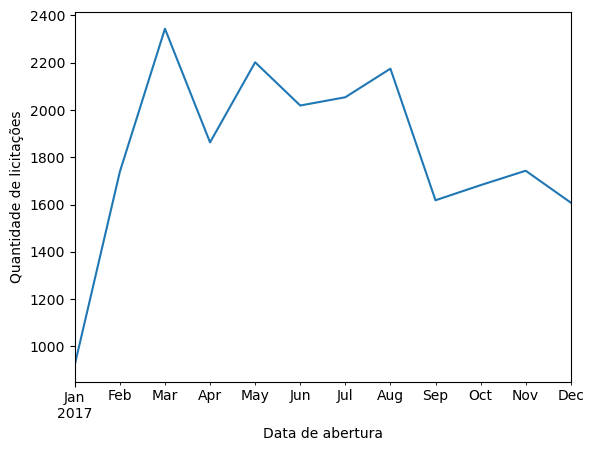

In [236]:
df_licitacao_month.index = pd.to_datetime(df_licitacao_month.index)
df_licitacao_month = df_licitacao_month.assign(Date=df_licitacao_month.index).resample('M').sum()
ax = df_licitacao_month.reset_index().plot(x='index',y='DT_ABERTURA')
ax.get_legend().remove()
ax.set_xlabel("Data de abertura")
ax.set_ylabel("Quantidade de licitações")

Ao mudar o ano das licitações pode-se observar certa tendência de crescimento no número de licitações durante os meses que correspondem a metade do ano.

Text(0, 0.5, 'Quantidade de licitações')

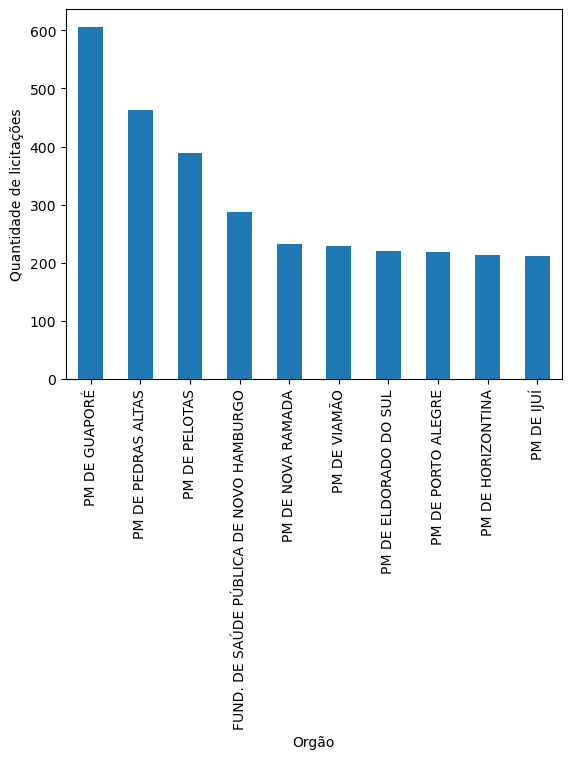

In [237]:
df_licitacao_orgao = pd.DataFrame(df_licitacao['NM_ORGAO'].value_counts())
ax = df_licitacao_orgao[:10].reset_index().plot.bar(x='index',y='NM_ORGAO')
ax.get_legend().remove()
ax.set_xlabel("Orgão")
ax.set_ylabel("Quantidade de licitações")

### Hipótese 1: O número de licitações cresce com o passar dos anos

In [4]:
df_2016 = pd.read_csv('2016.csv/licitacao.csv',low_memory=False)
df_2017 = pd.read_csv('2017.csv/licitacao.csv',low_memory=False)
df_2018 = pd.read_csv('2018.csv/licitacao.csv',low_memory=False)
df_2016 = df_2016.query("TP_OBJETO == 'COM'")
df_2017 = df_2017.query("TP_OBJETO == 'COM'")
df_2018 = df_2018.query("TP_OBJETO == 'COM'")

In [5]:
# Cada linha do arquivo licitacao.csv representa uma licitação.
df_2018.shape[0] > df_2017.shape[0] >  df_2016.shape[0]

True

###### Hipótese 1 é verdadeira

### Hipótese 2: Supondo que os itens que se referem a medicamentos contém mg na descrição

In [246]:
df_med = df_itens.query("DS_ITEM.str.contains('mg')", engine='python')
df_med

,CD_ORGAO,NR_LICITACAO,ANO_LICITACAO,CD_TIPO_MODALIDADE,NR_LOTE,NR_ITEM,NR_ITEM_ORIGINAL,DS_ITEM,QT_ITENS,SG_UNIDADE_MEDIDA,...,TP_ORCAMENTO,CD_TIPO_FAMILIA,CD_TIPO_SUBFAMILIA,TP_DOCUMENTO,NR_DOCUMENTO,TP_DOCUMENTO.1,NR_DOCUMENTO.1,TP_BENEFICIO_MICRO_EPP,PC_TX_ESTIMADA,PC_TX_HOMOLOGADA
165,45003,79.0,2017,PRP,1,1,1,Cod..9156- Larvicida biológico BTI(Bacillus th...,3000.0,KG,...,NaN,NaN,NaN,J,68833227000151,NaN,NaN,NaN,NaN,NaN
693,53100,5.0,2017,PRP,1,131,131,VALPROATO DE SÓDIO Cp 576mg ( equivalente a 50...,17000.0,CAP,...,NaN,NaN,NaN,J,5782733000149,NaN,NaN,T,NaN,NaN
694,53100,5.0,2017,PRP,1,130,130,VALPROATO DE SÓDIO OU ÁCIDO VALPROICO Cp 288m...,7000.0,CAP,...,NaN,NaN,NaN,J,5782733000149,NaN,NaN,T,NaN,NaN
695,53100,5.0,2017,PRP,1,59,59,FINASTERIDA Cp 5mg,6000.0,COM,...,NaN,NaN,NaN,J,5782733000149,NaN,NaN,T,NaN,NaN
696,53100,5.0,2017,PRP,1,31,31,CARVEDILOL Cp 25mg,7500.0,COM,...,NaN,NaN,NaN,J,5782733000149,NaN,NaN,T,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902704,78200,17.0,2017,PRE,1,43,43,hidroclorotiazida 25mg,350000.0,COM,...,NaN,NaN,NaN,J,2520829000140,NaN,NaN,T,NaN,NaN
902706,78200,17.0,2017,PRE,1,56,56,medroxiprogesterona (acetato) 150 mg,1500.0,UN,...,NaN,NaN,NaN,J,2520829000140,NaN,NaN,T,NaN,NaN
902707,78200,17.0,2017,PRE,1,20,20,captopril 25mg,750000.0,COM,...,NaN,NaN,NaN,J,2520829000140,NaN,NaN,T,NaN,NaN
902708,78200,17.0,2017,PRE,1,26,26,"ciprofloxacino 500mg comprimido fracionável, e...",20000.0,COM,...,NaN,NaN,NaN,J,2520829000140,NaN,NaN,T,NaN,NaN


5 medicamentos mais frequentes

In [247]:
df_med['DS_ITEM'].value_counts().nlargest(5)

Omeprazol 20mg     57
Prednisona 5mg     50
Prednisona 20mg    46
Loratadina 10mg    46
Atenolol 50mg      45
Name: DS_ITEM, dtype: int64

Medicamento comprado em maior quantidade

In [249]:
df_med[df_med['QT_ITENS'] == df_med['QT_ITENS'].max()]

,CD_ORGAO,NR_LICITACAO,ANO_LICITACAO,CD_TIPO_MODALIDADE,NR_LOTE,NR_ITEM,NR_ITEM_ORIGINAL,DS_ITEM,QT_ITENS,SG_UNIDADE_MEDIDA,...,TP_ORCAMENTO,CD_TIPO_FAMILIA,CD_TIPO_SUBFAMILIA,TP_DOCUMENTO,NR_DOCUMENTO,TP_DOCUMENTO.1,NR_DOCUMENTO.1,TP_BENEFICIO_MICRO_EPP,PC_TX_ESTIMADA,PC_TX_HOMOLOGADA
590306,88109,1.0,2017,PRE,1,114,114,Omeprazol 20mg -,12580428.0,COM,...,NaN,NaN,NaN,J,5531725000120,NaN,NaN,T,NaN,NaN


### Hipótese 3:  A PM é o orgão com mais pedidos de licitação

In [266]:
df_pm = df_2016.query("NM_ORGAO.str.contains('PM')", engine='python')
taxa = (df_pm.shape[0]/df_2016.shape[0])*100
print(f'PM foi responsável por {round(taxa,2)}% das licitações de 2016')

PM foi responsável por 89.04% das licitações de 2016


In [267]:
df_pm = df_2017.query("NM_ORGAO.str.contains('PM')", engine='python')
taxa = (df_pm.shape[0]/df_2017.shape[0])*100
print(f'PM foi responsável por {round(taxa,2)}% das licitações de 2017')

PM foi responsável por 89.85% das licitações de 2017


In [268]:
df_pm = df_2018.query("NM_ORGAO.str.contains('PM')", engine='python')
taxa = (df_pm.shape[0]/df_2018.shape[0])*100
print(f'PM foi responsável por {round(taxa,2)}% das licitações de 2018')

PM foi responsável por 81.0% das licitações de 2018


#### Hipótese 3 é verdadeira